In [ ]:
import pandas as pd

data = {
    "Tanggal" : ["2025-03-06", "2025-03-06", "2025-03-07", "2025-03-07", "2025-03-08", "2025-03-08", "2025-03-09", "2025-03-09", "2025-03-10", "2025-03-10",],
    "Produk"  : ["Minyak Jelantah", "Gula Putih", "Gula Merah", "Beras", "Mie Indomie", "Mie Sedap", "Susu Sachet", "Susu Kaleng", "Garam", "Madu"],
    "Jumlah Terjual": [9, 15, 7, 3, 7, 8, 13, 5, 11, 6],
    "Stok": [10, 17, 9, 18, 25, 21, 19, 16, 12, 22],
    "Harga Satuan": [7000, 6000, 14000, 12000, 3000, 3500, 2000, 9000, 4000, 1500],
}

#Simpan dalam DataFrame
df = pd.DataFrame(data)

#Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

print("File data_penjualan_latihan.csv berhasil dibuat dan bisa dibaca di Google Colab.")


File data_penjualan_latihan.csv berhasil dibuat dan bisa dibaca di Google Colab.


In [ ]:
df = pd.read_csv("data_penjualan_latihan.csv")

print(df.head())

      Tanggal           Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-06  Minyak Jelantah               9    10          7000
1  2025-03-06       Gula Putih              15    17          6000
2  2025-03-07       Gula Merah               7     9         14000
3  2025-03-07            Beras               3    18         12000
4  2025-03-08      Mie Indomie               7    25          3000


In [ ]:
print(df.isnull(). sum())

df["Tanggal"] = pd.to_datetime(df["Tanggal"])

df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

print(df.head())

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal           Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-03-06  Minyak Jelantah               9    10          7000   
1 2025-03-06       Gula Putih              15    17          6000   
2 2025-03-07       Gula Merah               7     9         14000   
3 2025-03-07            Beras               3    18         12000   
4 2025-03-08      Mie Indomie               7    25          3000   

   Total Penjualan  Keuntungan  
0            63000      -27000  
1            90000      -60000  
2            98000       28000  
3            36000        6000  
4            21000      -49000  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi Model :", accuracy_score(y_test, y_pred))

Akurasi Model : 1.0


In [ ]:

# Data produk baru yang akan diprediksi
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

print("Prediksi untuk produk baru (Jumlah Terjual = 8, Stok = 3):")

if prediksi <= 5:
    print("Produk perlu di-restock")
else:
    print("Stok masih cukup")

Prediksi untuk produk baru (Jumlah Terjual = 8, Stok = 3):
Produk perlu di-restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


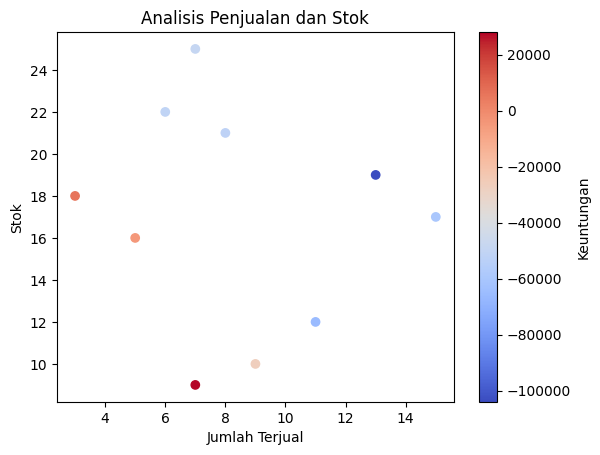

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()